In [41]:
import numpy as np
import pandas as pd


In [42]:
df = pd.read_csv("data.csv",index_col= "date",parse_dates = True)

In [43]:
df.head()

,price
date,
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73
1950-04-01,34.73
1950-05-01,34.73


In [21]:
df.tail()

,price
date,
2017-10-01,1280.677
2017-11-01,1283.189
2017-12-01,1265.674
2018-01-01,1332.809
2018-02-01,1333.775


<AxesSubplot:xlabel='date'>

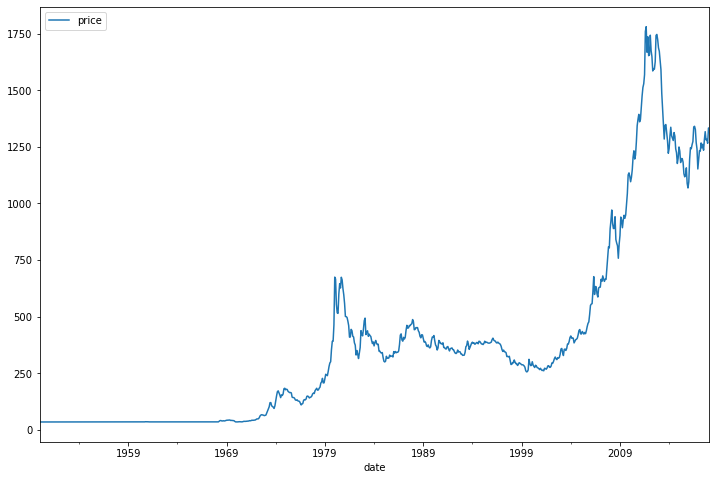

In [22]:
import matplotlib.pyplot as plt
df.plot(figsize=(12,8))

In [23]:
start_date = '2009-01-01'
end_date = '2018-01-01'
mask = (df.index >= start_date)&(df.index< end_date)
df = df.loc[mask]

In [24]:
df.head()

,price
date,
2009-01-01,857.726
2009-02-01,939.763
2009-03-01,925.989
2009-04-01,892.663
2009-05-01,926.855


<AxesSubplot:xlabel='date'>

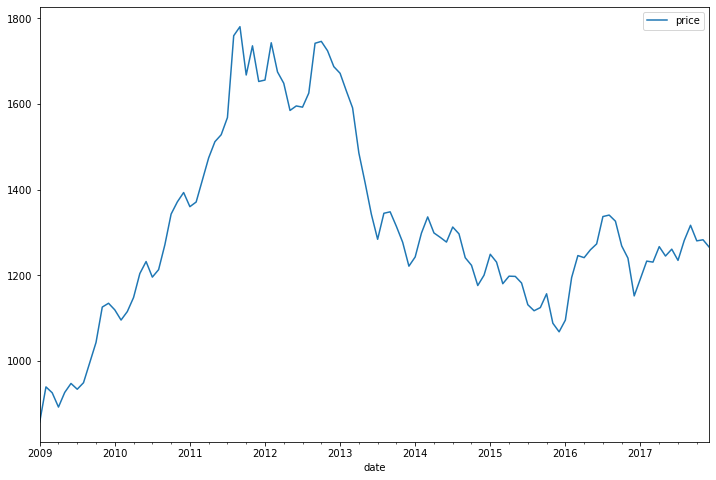

In [25]:
df.index.freq = 'MS'
df.plot(figsize = (12,8))

In [46]:
datayearly = df.rolling(window=12).mean()

<AxesSubplot:title={'center':'Yearly Average Gold Prices'}, xlabel='date'>

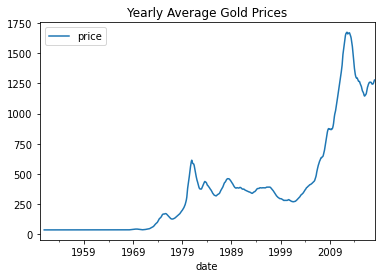

In [47]:
datayearly.plot(title="Yearly Average Gold Prices")

In [28]:
#ARIMA MODEL

In [51]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series,autolag= "AIC")
    labels = ["ADF Test Statistic","p value", 'logs used',"observations"]
    out = pd.Series(result[0:4],index=labels)
    print(out.to_string())
    if result [1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data has no unit root and stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and non-stationary")

In [49]:
adf_test(df.price)

ADF Test Statistic     -0.259757
p value                 0.931014
logs used              11.000000
observations          806.000000
Fail to reject the null hypothesis
Data has a unit root and non-stationary


In [40]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.Collecting pmdarima



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.


  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [58]:
from pmdarima import auto_arima
arima_fit = auto_arima(df['price'],start_P=0, start_Q = 0, max_P=10, max_Q=10, seasonal=False,trace =True)

ImportError: cannot import name '__version__' from 'statsmodels._version' (C:\Users\onata\anaconda3\lib\site-packages\statsmodels\_version.py)

In [57]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df['price'],order=(1,0,1))

ImportError: cannot import name '__version__' from 'statsmodels._version' (C:\Users\onata\anaconda3\lib\site-packages\statsmodels\_version.py)

In [56]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
